# Ajustando datos a un modelo con Bayes y Metropolis 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<Container object of 3 artists>

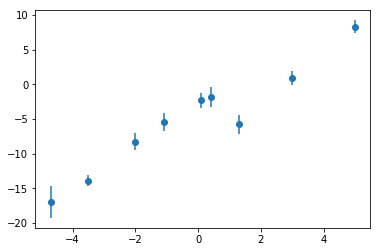

In [2]:
x_obs = np.array([-2.0,1.3,0.4,5.0,0.1, -4.7, 3.0, -3.5,-1.1])
y_obs = np.array([ -8.3,   -5.77,  -1.86, 8.3, -2.35, -16.98,  0.934, -13.89,  -5.49 ])
sigma_y_obs = np.array([-1.2,-1.36, -1.44, 0.92,-1.02, 2.3,-1.0, 0.8, -1.3])

plt.errorbar(x_obs,y_obs, yerr=sigma_y_obs, fmt='o')

Para usar Bayes planteamos la siguiente verosimilitud
$$
\mathcal{L}({x_i, y_i, \sigma_i}|m, b) = \prod_{i=1}^{N}\exp\left[-\frac{1}{2}\left(\frac{y_i - y_{model}(x_i, m, b)}{\sigma_i}\right)^2\right]
$$

In [3]:
def model(x,m,b):
    return x*m + b

def loglikelihood(x_obs, y_obs, sigma_y_obs, m, b):
    d = y_obs -  model(x_obs, m, b)
    d = d/sigma_y_obs
    d = -0.5 * np.sum(d**2)
    return d

def logprior(m, b):
    p = -np.inf
    if m < 10 and m >-10 and b >-20 and b<20:
        p = 0.0
    return p


In [4]:
N = 50000
lista_m = [np.random.random()]
lista_b = [np.random.random()]
logposterior = [loglikelihood(x_obs, y_obs, sigma_y_obs, lista_m[0], lista_b[0]) + logprior(lista_m[0], lista_b[0])]

sigma_delta_m = 0.2
sigma_delta_b = 1.0

for i in range(1,N):
    propuesta_m  = lista_m[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_m)
    propuesta_b  = lista_b[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b)

    logposterior_viejo = loglikelihood(x_obs, y_obs, sigma_y_obs, lista_m[i-1], lista_b[i-1]) + logprior(lista_m[i-1], lista_b[i-1])
    logposterior_nuevo = loglikelihood(x_obs, y_obs, sigma_y_obs, propuesta_m, propuesta_b) + logprior(propuesta_m, propuesta_b)

    r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
    alpha = np.random.random()
    if(alpha<r):
        lista_m.append(propuesta_m)
        lista_b.append(propuesta_b)
        logposterior.append(logposterior_nuevo)
    else:
        lista_m.append(lista_m[i-1])
        lista_b.append(lista_b[i-1])
        logposterior.append(logposterior_viejo)
lista_m = np.array(lista_m)
lista_b = np.array(lista_b)
logposterior = np.array(logposterior)

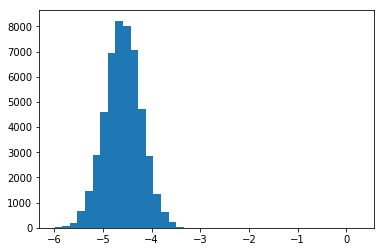

In [5]:
_=plt.hist(lista_b, bins=40)

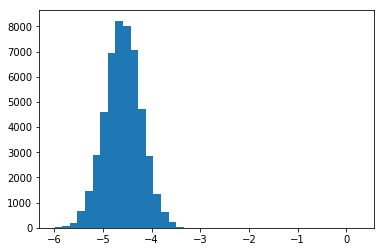

In [6]:
_=plt.hist(lista_b, bins=40)

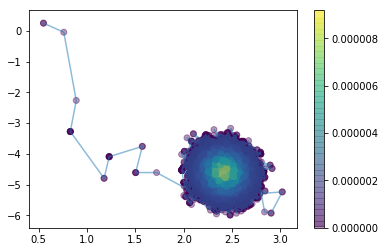

In [7]:
plt.plot(lista_m, lista_b, alpha=0.5)
plt.scatter(lista_m, lista_b, alpha=0.4, c=np.exp(logposterior))
plt.colorbar()

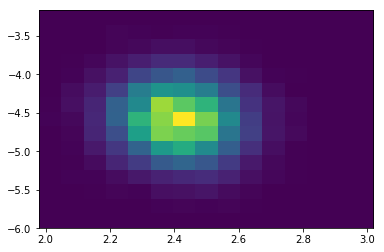

In [8]:
_=plt.hist2d(lista_m[100:], lista_b[100:], bins=15)

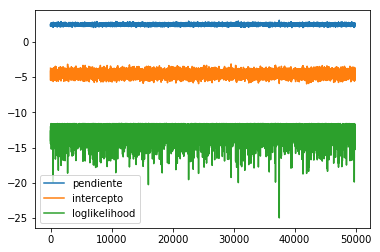

In [9]:
plt.plot(lista_m[100:], label='pendiente')
plt.plot(lista_b[100:], label='intercepto')
plt.plot(logposterior[100:], label='loglikelihood')
plt.legend()

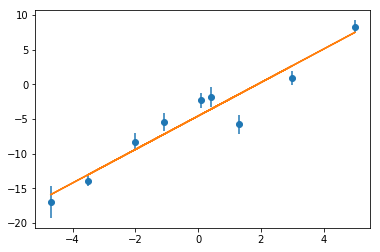

In [16]:
y_model = model(x_obs,np.mean(lista_m),np.mean(lista_b))
plt.errorbar(x_obs,y_obs, yerr=sigma_y_obs, fmt='o')
plt.plot(x_obs, y_model)

# Ejercicio 4.1

Ajuste la siguiente serie de datos a  un modelo cuadrático

<Container object of 3 artists>

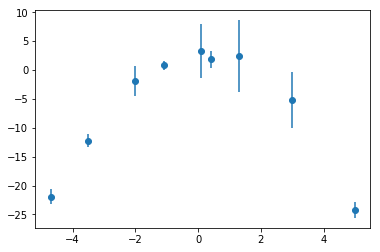

In [73]:
x_obs = np.array([-2.0,1.3,0.4,5.0,0.1, -4.7, 3.0, -3.5,-1.1])
y_obs = np.array([ -1.931,   2.38,   1.88,  -24.22,   3.31, -21.9,  -5.18, -12.23,   0.822])
sigma_y_obs = ([ 2.63,  6.23, -1.461, 1.376, -4.72,  1.313, -4.886, -1.091,  0.8054])
plt.errorbar(x, z, yerr=sigma_z, fmt='o')

In [74]:
def model(x,a,b,c):
    return a*x**2 + b*x + c

def loglikelihood(x_obs, y_obs, sigma_y_obs, a, b, c):
    d = y_obs -  model(x_obs, a,b,c)
    d = d/sigma_y_obs
    d = -0.5 * np.sum(d**2)
    return d

def logprior(a, b, c):
    p = -np.inf
    if a <= 5 and a >-100 and b >-20 and b<20 and c>-10 and c<10:
        p = 0.0
    return p


In [75]:
N = 200000
lista_a = [np.random.random()]
lista_b = [np.random.random()]
lista_c = [np.random.random()]
logposterior = [loglikelihood(x_obs, y_obs, sigma_y_obs, lista_a[0], lista_b[0], lista_c[0]) + logprior(lista_a[0], lista_b[0], lista_c[0])]

sigma_delta_a = 1.0
sigma_delta_b = 1.0
sigma_delta_c = 0.5

for i in range(1,N):
    propuesta_a  = lista_a[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_a)
    propuesta_b  = lista_b[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b)
    propuesta_c  = lista_c[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_c)

    logposterior_viejo = loglikelihood(x_obs, y_obs, sigma_y_obs, lista_a[i-1], lista_b[i-1], lista_c[i-1]) + logprior(lista_a[i-1], lista_b[i-1], lista_c[i-1])
    logposterior_nuevo = loglikelihood(x_obs, y_obs, sigma_y_obs, propuesta_a, propuesta_b, propuesta_c) + logprior(propuesta_a, propuesta_b, propuesta_c)

    r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
    alpha = np.random.random()
    if(alpha<r):
        lista_a.append(propuesta_a)
        lista_b.append(propuesta_b)
        lista_c.append(propuesta_c)
        logposterior.append(logposterior_nuevo)
    else:
        lista_a.append(lista_a[i-1])
        lista_b.append(lista_b[i-1])
        lista_c.append(lista_c[i-1])
        logposterior.append(logposterior_viejo)
lista_a = np.array(lista_a)
lista_b = np.array(lista_b)
lista_c = np.array(lista_c)
logposterior = np.array(logposterior)

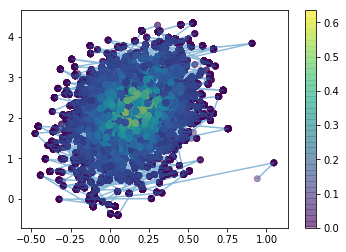

In [76]:
plt.plot(lista_b, lista_c, alpha=0.5)
plt.scatter(lista_b, lista_c, alpha=0.4, c=np.exp(logposterior))
plt.colorbar()

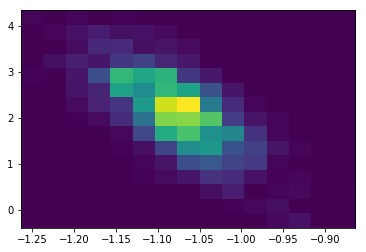

In [78]:
_=plt.hist2d(lista_a[100:], lista_c[100:],bins = 15)

(array([4.8200e+02, 2.2100e+03, 6.9530e+03, 2.0609e+04, 3.3760e+04,
        5.8114e+04, 4.2752e+04, 2.3738e+04, 8.3180e+03, 2.1490e+03,
        8.3400e+02, 0.0000e+00, 7.3000e+01, 7.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-1.26387112, -1.23083248, -1.19779385, -1.16475521, -1.13171658,
        -1.09867794, -1.0656393 , -1.03260067, -0.99956203, -0.9665234 ,
        -0.93348476, -0.90044612, -0.86740749, -0.83436885, -0.80133022,
        -0.76829158, -0.73525294, -0.70221431, -0.66917567, -0.63613704,
        -0.6030984 , -0.57

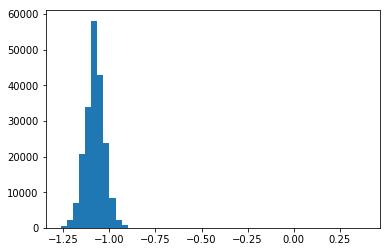

In [79]:
plt.hist(lista_a, bins = 50)

(array([1.2100e+02, 1.6000e+01, 5.4000e+01, 1.5700e+02, 3.4100e+02,
        2.2000e+02, 2.5100e+02, 7.0200e+02, 1.1220e+03, 2.1090e+03,
        1.9250e+03, 4.1450e+03, 5.3850e+03, 8.3600e+03, 1.0127e+04,
        1.0420e+04, 1.2124e+04, 1.3217e+04, 1.2408e+04, 9.8360e+03,
        1.5601e+04, 1.0606e+04, 1.4454e+04, 1.2280e+04, 1.1924e+04,
        8.6660e+03, 8.4050e+03, 5.2600e+03, 5.4260e+03, 4.2480e+03,
        4.0520e+03, 2.8220e+03, 1.1030e+03, 1.0110e+03, 2.2600e+02,
        2.4300e+02, 2.8900e+02, 1.2400e+02, 2.8000e+01, 1.0800e+02,
        6.8000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        8.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 7.0000e+00]),
 array([-0.47639753, -0.44592574, -0.41545395, -0.38498216, -0.35451037,
        -0.32403858, -0.2935668 , -0.26309501, -0.23262322, -0.20215143,
        -0.17167964, -0.14120785, -0.11073606, -0.08026427, -0.04979248,
        -0.0193207 ,  0.01115109,  0.04162288,  0.07209467,  0.10256646,
         0.13303825,  0.16

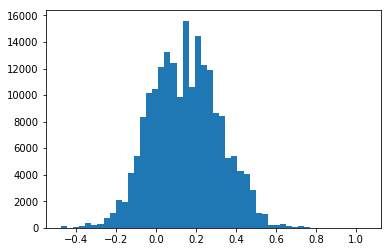

In [80]:
plt.hist(lista_b,bins=50)

(array([   98.,     0.,   729.,   274.,    61.,   451.,   144.,   524.,
          526.,   712.,   896.,  1383.,  2067.,  2833.,  2757.,  2364.,
         3186.,  4282.,  5453.,  7986.,  6246.,  9091.,  9415.,  9572.,
         9531., 11712.,  8373.,  9837., 11241.,  9436.,  9322.,  8828.,
         8451.,  9660.,  8091.,  5904.,  4653.,  2481.,  2532.,  1568.,
         1717.,  1254.,   693.,   917.,  1011.,  1124.,    77.,   176.,
          199.,   162.]),
 array([-0.39439312, -0.2999053 , -0.20541748, -0.11092966, -0.01644185,
         0.07804597,  0.17253379,  0.26702161,  0.36150943,  0.45599724,
         0.55048506,  0.64497288,  0.7394607 ,  0.83394852,  0.92843633,
         1.02292415,  1.11741197,  1.21189979,  1.30638761,  1.40087543,
         1.49536324,  1.58985106,  1.68433888,  1.7788267 ,  1.87331452,
         1.96780233,  2.06229015,  2.15677797,  2.25126579,  2.34575361,
         2.44024142,  2.53472924,  2.62921706,  2.72370488,  2.8181927 ,
         2.91268051,  3.0071683

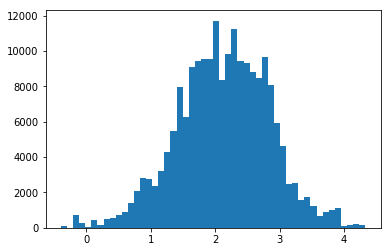

In [81]:
plt.hist(lista_c,bins=50)

In [82]:
param_a = np.mean(lista_a)
param_b = np.mean(lista_b)
param_c = np.mean(lista_c)
print(param_a)
print(param_b)
print(param_c)


-1.0788441616774647
0.14769145598581326
2.1306917694259657


In [83]:
print(param_c)

2.1306917694259657


<Container object of 3 artists>

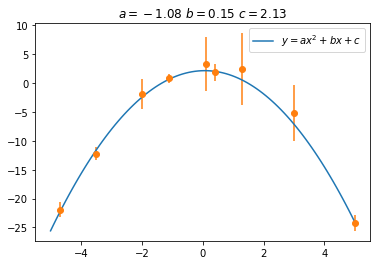

In [88]:
x = np.array([-2.0,1.3,0.4,5.0,0.1, -4.7, 3.0, -3.5,-1.1])
z = np.array([ -1.931,   2.38,   1.88,  -24.22,   3.31, -21.9,  -5.18, -12.23,   0.822])
sigma_z = ([ 2.63,  6.23, -1.461, 1.376, -4.72,  1.313, -4.886, -1.091,  0.8054])
xs = np.linspace(-5,5,100)
ys = model(xs,param_a,param_b,param_c)
plt.plot(xs,ys, label= r"$y=ax^2+bx+c$")
plt.legend()
plt.title(r"$a={:.2f}\ b={:.2f}\ c={:.2f}$".format(param_a,param_b,param_c))
plt.errorbar(x, z, yerr=sigma_z, fmt='o')
plt.savefig("results.pdf")